# Project


#### For this project we will start by importing the necessary libraries 

In [1]:
#!pip install pyvis

In [2]:
import pandas as pd
import numpy as np

import networkx as nx
from networkx.algorithms import bipartite 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import ListedColormap
import seaborn as sns
from pyvis.network import Network 

from main import GraphAnalysis

In [3]:
#pip install decorator==4.3

In [4]:
import warnings
warnings.filterwarnings('ignore')

##### Now we will import the csv files to start working with the data

In [38]:
#First we need to get the data from the csv file, made into a data frame
attributes= pd.read_csv('Data/nodeattribute.csv', delimiter=';')
edgelist= pd.read_csv('Data/edgelist.csv',delimiter=';')
g_attributes= attributes[attributes['0']=='gene']
d_attributes = attributes[attributes['0']=='disease']


#We need to convert the data frame into a dictionary to use the set_node_attributes 
nodes_attr = attributes.set_index('Id').to_dict(orient='index')
g_nodes_attr = g_attributes.set_index('Id').to_dict(orient='index')
d_nodes_attr= d_attributes.set_index('Id').to_dict(orient='index')


#Made it into a list
g_nodes= g_attributes['Id'].to_list()
d_nodes=d_attributes['Id'].to_list()
edges= edgelist.values.tolist()


G = nx.Graph()
G.add_nodes_from(g_nodes, bipartite=0)
G.add_nodes_from(d_nodes, bipartite=1)
nx.set_node_attributes(G, nodes_attr)
G.add_edges_from(edges)

print(d_nodes)

#bottom_nodes, top_nodes = bipartite.sets(G)


[55, 47, 114, 45, 87, 54, 81, 48, 70, 137, 223, 390, 220, 325, 68, 208, 213, 30, 65, 139, 185, 202, 302, 364, 634, 53, 86, 99, 117, 155, 41, 59, 130, 239, 285, 640, 63, 125, 197, 224, 236, 414, 420, 448, 822, 42, 110, 122, 140, 146, 186, 266, 324, 332, 411, 775, 37, 120, 222, 306, 367, 541, 751, 786, 44, 74, 109, 164, 187, 200, 215, 219, 245, 327, 384, 607, 661, 736, 778, 940, 80, 119, 121, 123, 133, 158, 180, 199, 203, 235, 237, 248, 277, 280, 290, 314, 340, 369, 401, 419, 423, 429, 441, 447, 474, 497, 570, 602, 782, 790, 851, 938, 968, 43, 78, 79, 101, 113, 118, 132, 165, 177, 189, 201, 216, 226, 227, 270, 282, 292, 328, 402, 464, 467, 527, 560, 574, 671, 703, 742, 744, 795, 796, 856, 880, 919, 953, 984, 985, 36, 38, 46, 100, 126, 128, 131, 154, 156, 181, 191, 192, 209, 210, 211, 217, 238, 272, 286, 287, 307, 322, 323, 331, 341, 370, 385, 408, 417, 426, 446, 454, 457, 463, 466, 470, 471, 472, 476, 483, 484, 485, 491, 493, 526, 545, 550, 559, 575, 616, 681, 682, 685, 691, 692, 765, 76

In [6]:
#Checking that the code worked properly
G.nodes()
#G.edges()
#G.nodes[55]["Label"]
#nodes_attr"""

G.nodes[117]['bipartite']

1

In order to start working with the graph we need to make sure it is connected 

In [7]:
print(nx.is_connected(G))
print(nx.is_bipartite(G))


True
True


### Project description
1. Basic network description of your data (what type of network it is, what does it represent, is it real or synthetically generated, etc). In practice, the result of project phase #1 (finding data).

It is a unipartite, undirected and unweighted network that describes the associations between human diseases and human genes, as extracted from the Morbid Map (MM) of the Online Mendelian Inheritance in Man (OMIM) in 2005.

Source : https://github.com/gephi/gephi/wiki/Datasets


2. Basic network statistics of your data (number of nodes, edges, clustering, degree distribution, etc). In practice, the result of project phase #2 (exploratory data analysis)

In [8]:
#Graph properties 
"""
nx.is_directed(G)
nx.is_bipartite(G)
ns.is_weighted(G)

"""

#the number of nodes and egdes
num_nodes = len(G.nodes())
num_genes= len(g_nodes)
num_diseases= len(d_nodes) 
num_edges= len(G.edges())

#Printing the num of nodes and edges
print(f'The number of nodes that are genes is: {num_genes}\nThe number of nodes that are diseases is: {num_diseases}\n---\nThe total number of nodes is: {num_nodes} ')
print(f'\n---\nThe number of edges is: {num_edges}')



The number of nodes that are genes is: 903
The number of nodes that are diseases is: 516
---
The total number of nodes is: 1419 

---
The number of edges is: 1550


In [9]:
def make_df(column2, function, graph):
    df = pd.DataFrame(list(function(graph).items()), columns=['Id', column2])
    df.set_index('Id', inplace=True)

    return df

closeness = make_df('closeness', nx.closeness_centrality, G)
degree_centrality = make_df('degree', nx.degree_centrality, G)

df= degree_centrality.join(closeness, on='Id')
#density 
density = nx.density(G)



#### Clustering

In [10]:
#global clustering coefficient
print(nx.transitivity(G))

#average clustering coefficient
print(nx.average_clustering(G))

#local clustering coefficient
#print(nx.clustering(G))

0
0.0


#### Degree Distribution

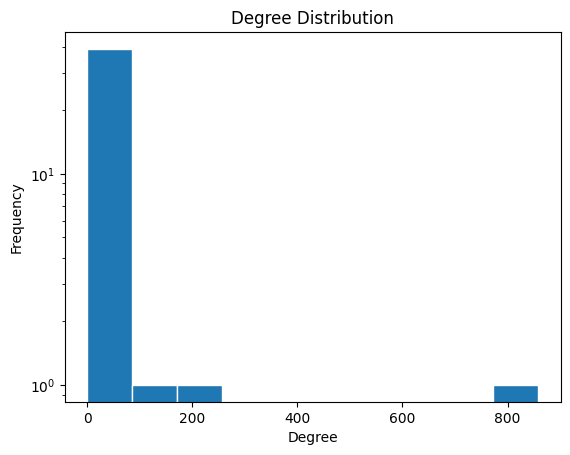

In [11]:
degree_freq = nx.degree_histogram(G)
fig, ax = plt.subplots()

sns.set_theme(style='whitegrid')
plt.yscale('log')
ax.hist(degree_freq);
ax.set_xlabel('Degree');
ax.set_ylabel('Frequency');
ax.set_title('Degree Distribution');

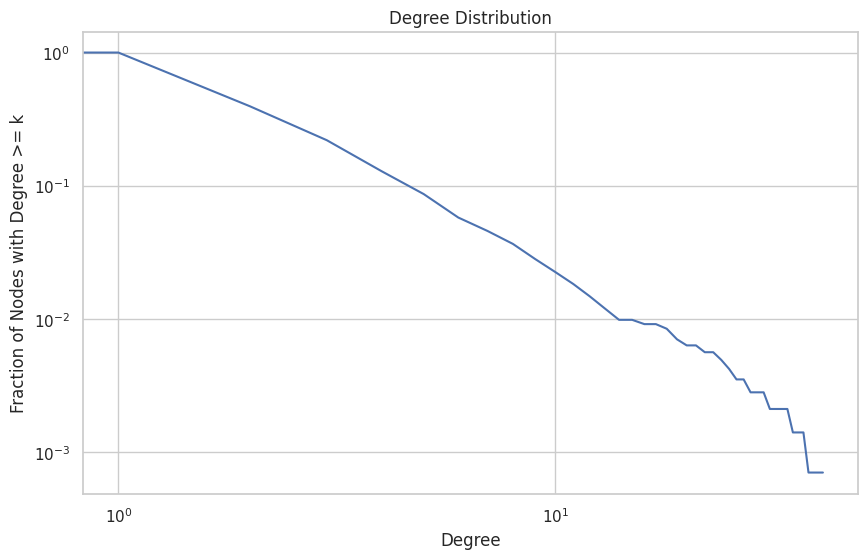

In [12]:
degree_freq = [x/sum(degree_freq) for x in degree_freq] #normalized degree frequency
degree_range = range(len(degree_freq)) 

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Degree Distribution');
ax.set_xlabel('Degree');
ax.set_ylabel('Fraction of Nodes with Degree >= k');

deg = [0]*len(degree_freq)
sum_of_all = sum(degree_freq)
for i in range(len(deg)):
    for j in range(i,len(deg)):
        deg[i] += degree_freq[j]
    deg[i] = deg[i]/sum_of_all

ax.loglog(degree_range, deg);



### Graph representation

In [13]:
print(nx.is_directed(G))
print(nx.is_bipartite(G))
print(nx.is_weighted(G))
label= nx.get_node_attributes(G,'Label')
classification = nx.get_node_attributes(G,'0')
typeofclassification= nx.get_node_attributes(G,'1')

#classification[1329]
#typeofclassification[1329]

#G.nodes()
#nodes_attr

False
True
False


In [14]:
def draw_graph(G):   
    fig, ax = plt.subplots(figsize=(150,100))
    color_map = ['#7c0a02' if G.nodes[node]['bipartite'] == 0 else '#f4c2c2' for node in G]

    nx.draw(G, node_color = color_map, with_labels = True)

    plt.title('Graph representation', fontsize = 100);

# Visualizing the network using Pyvis

In [15]:
def make_interactive(attributes, edges):
    trial = attributes.set_index('Id')
    n = attributes['Id'].to_list()
    t= attributes['Label'].to_list()
    l= attributes['0'].to_list()
    l1 = attributes['1'].to_list()
    attributes['color'] = np.where(attributes['0']== 'disease', '#7c0a02' , '#f4c2c2')
    c = attributes['color'].to_list()


    net = Network('100vh', '100vw')

    net.add_nodes(n, title=l, label=t, color=c)
    net.add_edges(edges)
    net.show('jk.html')

In [16]:
#draw_graph(G)

In [17]:
Gp = bipartite.weighted_projected_graph(G, d_nodes)
#draw_graph(Gp)

In [18]:

t= pd.DataFrame(list(Gp.edges(data=True)), columns=['src', 'trg', 'Weight'])
#list(Gp.nodes(data=True))
t['Weight'] = [int(k['weight']) for k in t['Weight']]

t.to_csv(sep='\t', path_or_buf='Data/new_file',header=True)



In [19]:
list(Gp.nodes(data=True))

[(55,
  {'bipartite': 1,
   'Label': 'Deafness',
   'timeset': nan,
   '0': 'disease',
   '1': 'Ear,Nose,Throat',
   'giantcomponent': 0}),
 (47,
  {'bipartite': 1,
   'Label': 'Leukemia',
   'timeset': nan,
   '0': 'disease',
   '1': 'Cancer',
   'giantcomponent': 0}),
 (114,
  {'bipartite': 1,
   'Label': 'Colon cancer',
   'timeset': nan,
   '0': 'disease',
   '1': 'Cancer',
   'giantcomponent': 0}),
 (45,
  {'bipartite': 1,
   'Label': 'Retinitis pigmentosa',
   'timeset': nan,
   '0': 'disease',
   '1': 'Ophthamological',
   'giantcomponent': 0}),
 (87,
  {'bipartite': 1,
   'Label': 'Diabetes mellitus',
   'timeset': nan,
   '0': 'disease',
   '1': 'Endocrine',
   'giantcomponent': 0}),
 (54,
  {'bipartite': 1,
   'Label': 'Cardiomyopathy',
   'timeset': nan,
   '0': 'disease',
   '1': 'Cardiovascular',
   'giantcomponent': 0}),
 (81,
  {'bipartite': 1,
   'Label': 'Mental retardation',
   'timeset': nan,
   '0': 'disease',
   '1': 'Neurological',
   'giantcomponent': 0}),
 (48,


In [20]:
def visualize_bipar():
    temp = d_attributes
    categories = np.unique(d_attributes['1'])
    temp['1'] = pd.Categorical(temp['1'])

    pos = nx.spring_layout(Gp)
    colorlegend = {a:b  for b,a in enumerate(categories)}

    colours = ['#800000', '#FF0000', '#FF7F50', '#FF8C00', '#FFD700',
    '#EEE8AA', '#BDB76B', '#808000', '#7CFC00', '#006400', 
    '#98FB98', '#20B2AA', '#2F4F4F', '#00FFFF', '#AFEEEE',
    '#6495ED','#191970','#8A2BE2','#4B0082','#DDA0DD',
    '#A0522D','#DEB887']
    colours = ListedColormap(colours)

    val_map = temp['1'].cat.codes.to_dict()
    values = [val_map.get(node, 0) for node in Gp.nodes()]
    cNorm  = colors.Normalize(vmin=0, vmax=max(values))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colours)

    f = plt.figure(1, figsize=(30, 30))
    ax = f.add_subplot(1,1,1)
    for label in colorlegend:
        ax.plot([0],[0],color=scalarMap.to_rgba(colorlegend[label]),label=label)

    nx.draw(Gp, pos,  with_labels = True, node_color = temp['1'].cat.codes, cmap = colours, vmin = 0, vmax = max(values))

    plt.legend();


## Assortativity of the projected network
We use the function $trace(M)-sum(M^2))/(1-sum(M^2))$, where M is the joint probability distribution (mixing matrix) of the specified attribute.
or in easier to understand math
$$r = \dfrac{\sum_ie_{ii} - \sum_ia_ib_i}{1-\sum_ia_ib_i}$$

In [21]:
nx.attribute_assortativity_coefficient(Gp, "1")

0.4412095585382886

A score of 0.44 means we can say it is moderately assortative since it is above 0 on a [-1;1] scale. 

## Clustering

In [22]:
#global clustering coefficient
print(nx.transitivity(Gp))

#average clustering coefficient
print(nx.average_clustering(Gp))

#local clustering coefficient
print(nx.clustering(Gp))

0.4304705634100021
0.6358304997771198
{55: 0.08, 47: 0.1076923076923077, 114: 0.12408163265306123, 45: 0.125, 87: 0.09057971014492754, 54: 0.10476190476190476, 81: 0.18681318681318682, 48: 0.21428571428571427, 70: 0.2857142857142857, 137: 0.22298850574712645, 223: 0.25, 390: 0.3, 220: 0, 325: 0.6545454545454545, 68: 0.16363636363636364, 208: 0, 213: 0.4, 30: 0.19047619047619047, 65: 0.19444444444444445, 139: 0.2789473684210526, 185: 0.13333333333333333, 202: 1.0, 302: 0.25, 364: 0.13333333333333333, 634: 0.27692307692307694, 53: 0.25, 86: 0.25, 99: 0.28888888888888886, 117: 0.19658119658119658, 155: 0.37362637362637363, 41: 0.3333333333333333, 59: 0.2924901185770751, 130: 0.3333333333333333, 239: 0.14285714285714285, 285: 0.38095238095238093, 640: 0.3333333333333333, 63: 0, 125: 0.3333333333333333, 197: 0.35, 224: 0.425, 236: 0.14285714285714285, 414: 0.16666666666666666, 420: 1.0, 448: 0.5, 822: 0, 42: 0.5333333333333333, 110: 0.3333333333333333, 122: 0.3333333333333333, 140: 0.194444

Text(0, 0.5, 'Degrees')

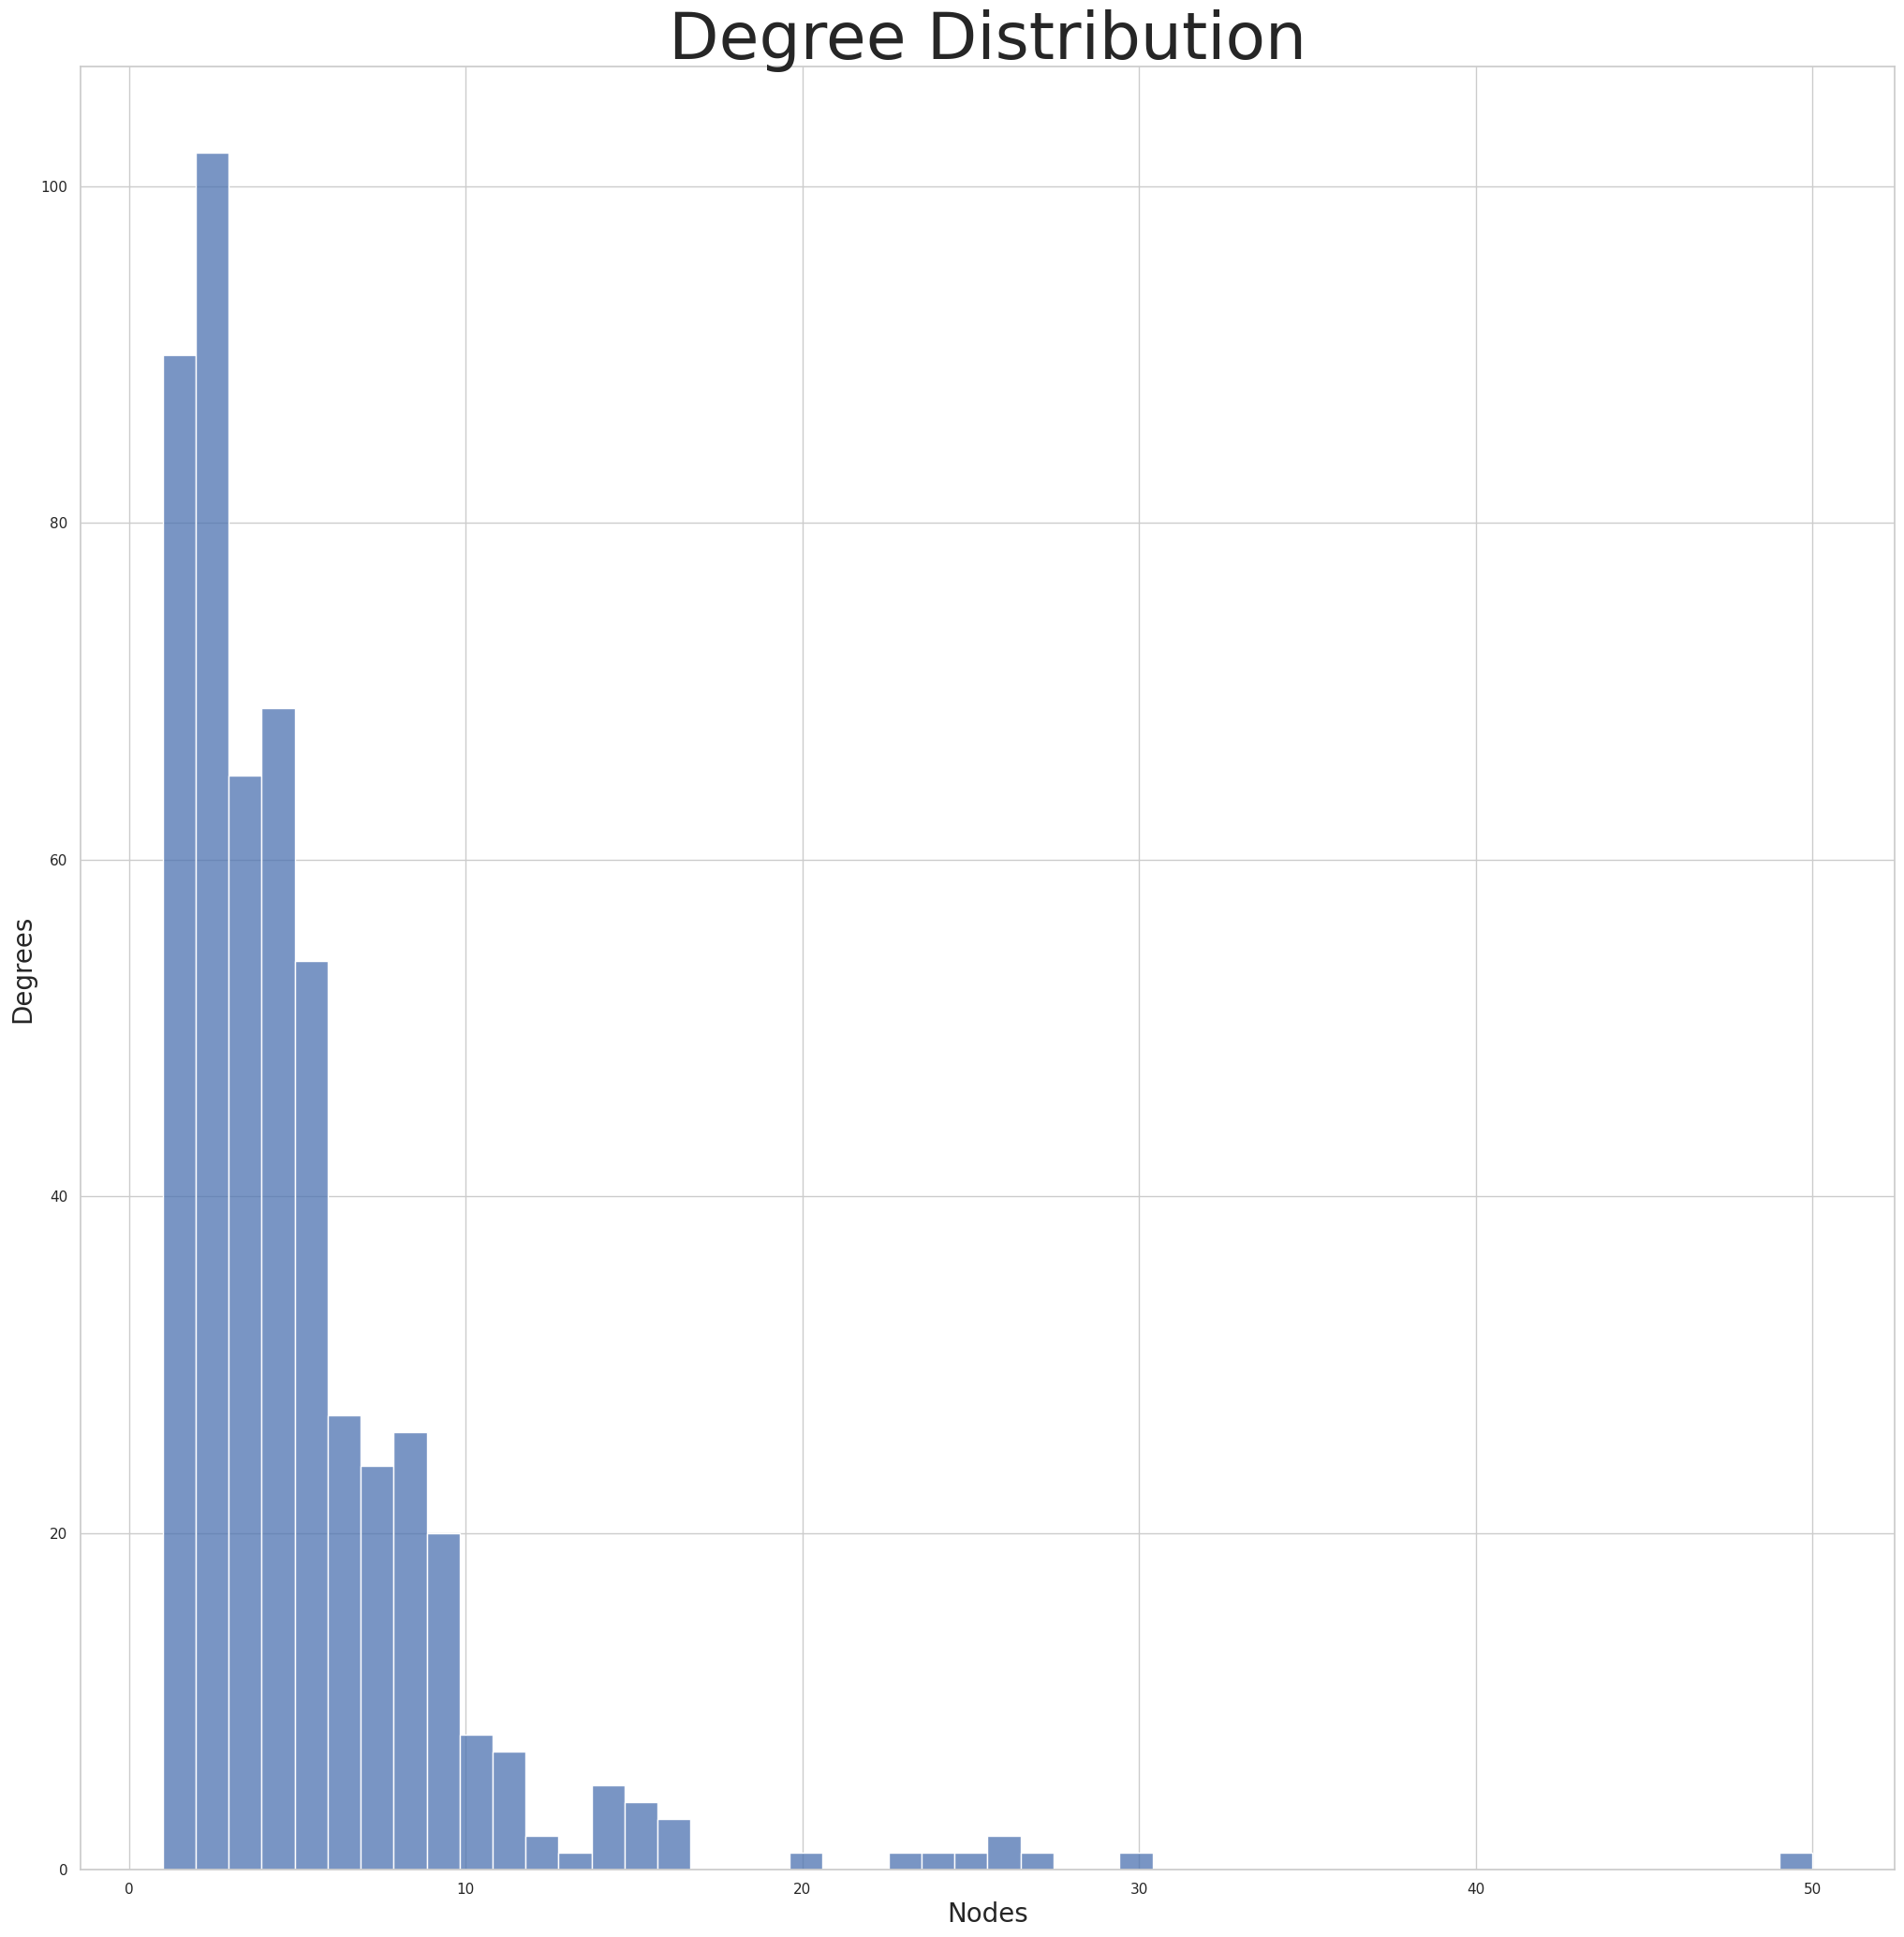

In [23]:
from collections import defaultdict

def homophily_per_group(graph):
    types_diseases = defaultdict(list)
    for node in graph.nodes():
        group = graph.nodes[node]['1']
        count = 0 
        num_neighbors= len(list(graph.neighbors(node)))
        for n_node in list(graph.neighbors(node)):
            n_group= graph.nodes[n_node]['1']
            
            if group == n_group: 
                count +=1
                
        types_diseases[group].append(count/num_neighbors)
   
    for key,val in types_diseases.items():
        value = np.round(sum(val) / len(val), decimals=3)
        types_diseases.update({key: [value]})
        
    df = pd.DataFrame.from_dict(types_diseases, orient='columns')
    return df 


#homophily_per_group(bipar_weighted).items()



def list_degrees(graph): 
    l = list(graph.degree())
    l_sorted= sorted(l, key=lambda t: t[1], reverse=True)
    
    return l_sorted

degrees = pd.DataFrame(list_degrees(Gp), columns=['NodeID', 'Degree'])

plt.figure(1, figsize=(25, 25))
sns.histplot(data=degrees,  x='Degree')
plt.title('Degree Distribution', fontsize=50)
plt.xlabel('Nodes', size=20)
plt.ylabel('Degrees', size=20)



In [24]:
degrees.head(200)
Gp.nodes[45]['1']
homophily_per_group(Gp)
list(Gp.neighbors(68))
def group(graph):
    dict_nodes=defaultdict(list)
    num_nodes = defaultdict(int)
    for node in graph.nodes():
        group = graph.nodes[node]['1']
        dict_nodes[group].append(node)
        num_nodes[group] += 1
    
    return dict_nodes, num_diseases


group(Gp)

#barplot of nodes above th
#th at least 5% of the data -> 26
#68, 187, 902, 1307

Gp.nodes[1307]

{'bipartite': 1,
 'Label': 'Pneumothorax, primary spontaneous',
 'timeset': nan,
 '0': 'disease',
 '1': 'Respiratory',
 'giantcomponent': 0}

In [25]:
from networkx.algorithms.community import greedy_modularity_communities
homophily_per_group(Gp)

,"Ear,Nose,Throat",Cancer,Ophthamological,Endocrine,Cardiovascular,Neurological,Hematological,Nutritional,Muscular,Respiratory,...,Dermatological,Psychiatric,Connective tissue disorder,Metabolic,Gastrointestinal,Bone,Skeletal,Renal,Developmental,Unclassified
0,0.693,0.794,0.768,0.505,0.462,0.537,0.563,0.375,0.497,0.0,...,0.616,0.364,0.25,0.2,0.09,0.317,0.359,0.062,0.094,0.0


In [26]:
from scipy.stats.contingency import crosstab
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
c = greedy_modularity_communities(Gp, n_communities=22)

expected = pd.DataFrame(Gp.nodes())
expected["color"]= 0
expected.columns = ["node", "group_num"]
expected['nodes']= Gp.nodes()

exp = expected.set_index("node")

for i, lst in enumerate(c):
    for nod in list(lst):
        exp.loc[nod]['group_num'] = i

groups= []
for node in exp['nodes']:
    groups.append(Gp.nodes[node]['1'])
exp['group']= groups 
normalized_mutual_info_score(exp['group_num'], exp['group'])


0.4401933593741316

In [27]:
genes = pd.DataFrame(columns=['gene','weight'])
genes['gene']=g_nodes

genes_df= genes.set_index('gene')
for gene in g_nodes:
    lst= list(G.neighbors(gene))
    total_weight = 0
    for i in lst:
        weight = 1/len(list(G.neighbors(i)))
        total_weight += weight
    genes_df.at[gene,'weight']= total_weight/G.degree(gene)
genes_df.reset_index()
genes_df.sort_index(key=lambda x: genes_df['weight'], ascending=False, inplace=True)

genes_df




,weight
gene,
3854,0.85
3653,0.833333
3875,0.833333
2569,0.833333
3913,0.833333
...,...
1990,0.02439
1992,0.02439
1994,0.02439


In [28]:
for node_desease in list(G.neighbors(3720)):
    print(Gp.nodes[node_desease]['1'])

Skeletal
Cancer
Cancer
Cancer
Skeletal
Skeletal
Skeletal
Skeletal


In [29]:
expected = pd.DataFrame(Gp.nodes())
expected["color"]= 0
expected.columns = ["node", "group_num"]
expected['nodes']= Gp.nodes()

exp = expected.set_index("node")
print(exp)
exp['group']= "none" 
for i, lst in enumerate(c):
    for nod in list(lst):
        exp.loc[nod]['group_num'] = i

for node in exp['nodes']:
    exp.loc[node]['group']= Gp.nodes[node]['1']

normalized_mutual_info_score(exp['group_num'], exp['group'])

exp.loc[55]['group'] = "casa"
exp.loc[55]['group'] 

      group_num  nodes
node                  
55            0     55
47            0     47
114           0    114
45            0     45
87            0     87
...         ...    ...
1303          0   1303
1304          0   1304
1305          0   1305
1306          0   1306
1307          0   1307

[516 rows x 2 columns]


'none'

### Targeted Attacks

We first make a sorted list in descending order 

In [30]:
sorted_G_nodes = list_degrees(G)
gcc_sizes = []

In [31]:
L = G.copy()
for i in range(20):
   gcc_sizes.append(len(max(nx.connected_components(L), key = len)) / len(G.nodes))
   L.remove_node(sorted_G_nodes[i][0])

In [32]:
K = G.copy()
sizes = list(genes_df.iterrows())
size_weighted = []

for gene in sizes:
    size_weighted.append(len(max(nx.connected_components(K), key = len)) / len(G.nodes))
    K.remove_node(gene[0])


In [33]:
size_weighted = size_weighted[:20]

In [34]:
sns.set_style('darkgrid')

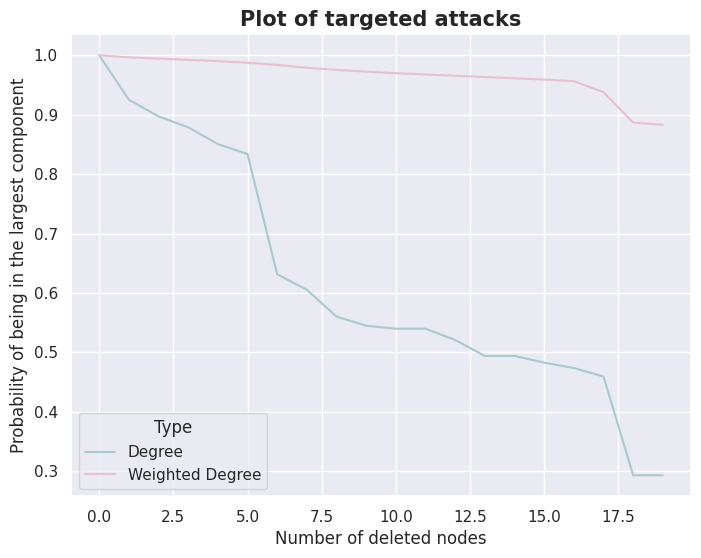

In [35]:
fig, ax = plt.subplots(figsize = (8,6))
plot_data = pd.DataFrame({
    'NumNodes' : [i for i in range(20)],
    'Degree' : gcc_sizes,
    'Weighted Degree': size_weighted
})
colors_taratt = ['#aac9ce', '#e5c1cd']
sns.lineplot(x = 'NumNodes', y = 'value', hue = 'Type', palette = colors_taratt, data = pd.melt(plot_data, ['NumNodes'], var_name= 'Type'));
ax.set_title('Plot of targeted attacks', size = 15, weight ='bold')
ax.set(xlabel = 'Number of deleted nodes', ylabel= 'Probability of being in the largest component');

### Combining targeted attacks and community discovery

We made a class ```ClassAnalysis()``` in the file main.py where we combine the idea of targeted attacks with community discovery algorithms. Our results are visualized in the following plots:

In [45]:
nodes_degree = [sorted_G_nodes[i][0] for i in range(20)]
nodes_weight = [i[0] for i in sizes]
nodes_weight = nodes_weight[:20]

analysis_d = GraphAnalysis(G.copy(), nodes_degree, d_nodes)
analysis_w = GraphAnalysis(G.copy(), nodes_weight, d_nodes)
print(nodes_weight), print(d_nodes)
# df_homophily_d, df_community_d, largest_component_d, diameter_d = analysis_d.final_analysis()
# df_homophily_w, df_community_w, largest_component_w, diameter_w = analysis_w.final_analysis()

[3854, 3653, 3875, 2569, 3913, 3943, 3609, 3555, 3706, 2120, 2568, 3192, 3851, 3164, 3803, 3759, 3831, 3958, 3821, 2434]
[55, 47, 114, 45, 87, 54, 81, 48, 70, 137, 223, 390, 220, 325, 68, 208, 213, 30, 65, 139, 185, 202, 302, 364, 634, 53, 86, 99, 117, 155, 41, 59, 130, 239, 285, 640, 63, 125, 197, 224, 236, 414, 420, 448, 822, 42, 110, 122, 140, 146, 186, 266, 324, 332, 411, 775, 37, 120, 222, 306, 367, 541, 751, 786, 44, 74, 109, 164, 187, 200, 215, 219, 245, 327, 384, 607, 661, 736, 778, 940, 80, 119, 121, 123, 133, 158, 180, 199, 203, 235, 237, 248, 277, 280, 290, 314, 340, 369, 401, 419, 423, 429, 441, 447, 474, 497, 570, 602, 782, 790, 851, 938, 968, 43, 78, 79, 101, 113, 118, 132, 165, 177, 189, 201, 216, 226, 227, 270, 282, 292, 328, 402, 464, 467, 527, 560, 574, 671, 703, 742, 744, 795, 796, 856, 880, 919, 953, 984, 985, 36, 38, 46, 100, 126, 128, 131, 154, 156, 181, 191, 192, 209, 210, 211, 217, 238, 272, 286, 287, 307, 322, 323, 331, 341, 370, 385, 408, 417, 426, 446, 454, 4

(None, None)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae90e520-efbc-47c2-a035-acfb4219bc01' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>